# List 2

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

import cv2
import gym
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import numpy as np
import matplotlib.cm as cm

from IPython import display as ipythondisplay

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input, UpSampling2D, Conv2D, Dense, Bidirectional, ZeroPadding2D,LeakyReLU, Reshape, Flatten, Dropout, Activation, BatchNormalization, LSTM, Embedding, GlobalAveragePooling2D, BatchNormalization, MaxPool2D, Conv2D, SpatialDropout2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint 
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import  Adam

from tensorflow.keras.datasets import cifar10, fashion_mnist
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import os

from tensorflow import keras
from keras.utils.vis_utils import plot_model

## Question 1
a) $f(x_1, x_2) = (1-x_1)^2 + 100(x_2 - x_1^2)^2  \hspace{1cm} -10\leq x_1 \leq 10$ \, $-10\leq x_2 \leq 10$ 

In [ ]:
# a
x1, x2 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
z =  (1-x1)**2 + 100*(x2-x1**2)**2

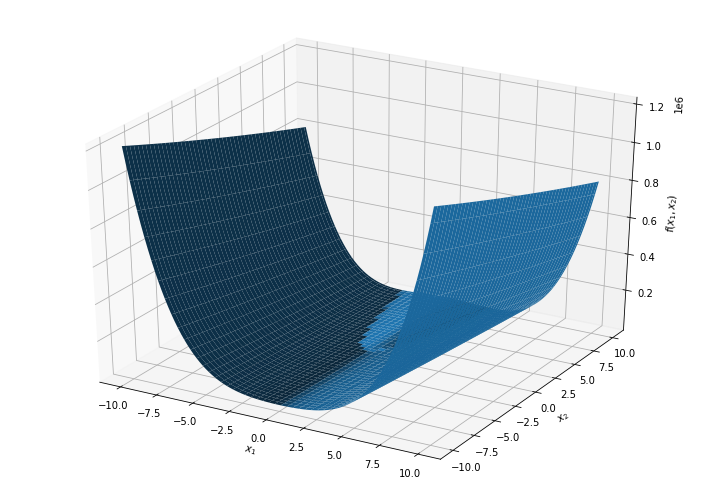

In [ ]:
# graphic b
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(projection='3d'))
ax.plot_surface(x1, x2, z)

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.tight_layout()
plt.show()

In [ ]:
# split train and test
x_train, x_test, y_train, y_test = train_test_split(
    np.vstack([x1.flatten(), x2.flatten()]).T, 
    z.flatten(), 
    test_size=0.2, 
    random_state=505
)

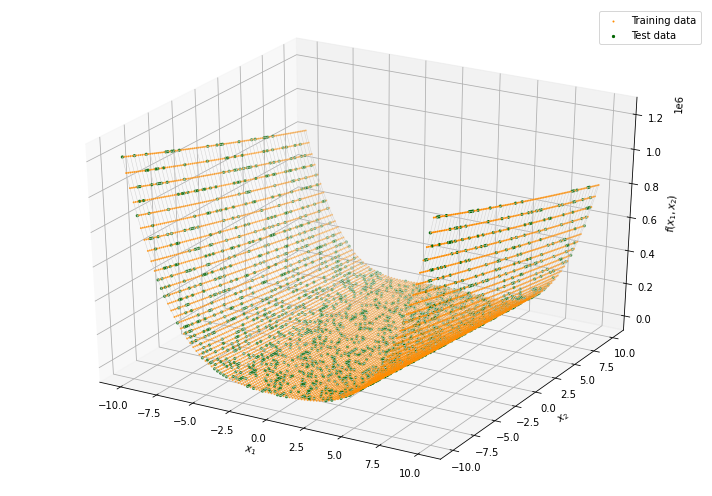

In [ ]:
# graphic before train_test_split
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(projection='3d'))

ax.plot_wireframe(x1, x2, z, linewidths=0.5, color='lightgrey')
ax.scatter(x_train[:,0], x_train[:,1], y_train, s=1, color='darkorange', label='Training data')
ax.scatter(x_test[:,0], x_test[:,1], y_test, s=5, color='darkgreen', label='Test data')

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# mlp model
mlp = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')
])

mlp.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 2,977
Trainable params: 2,977
Non-trainabl

In [ ]:
history = mlp.fit(
    x_train, y_train,
    batch_size=8,
    epochs=100,
    validation_split=0.1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
    ]
)

Epoch 1/100
900/900 [==============================] - 5s 3ms/step - loss: 72607186944.0000 - val_loss: 33732118528.0000 - lr: 0.0010
Epoch 2/100
900/900 [==============================] - 2s 2ms/step - loss: 32486748160.0000 - val_loss: 28747450368.0000 - lr: 0.0010
Epoch 3/100
900/900 [==============================] - 2s 3ms/step - loss: 27862544384.0000 - val_loss: 24206911488.0000 - lr: 0.0010
Epoch 4/100
900/900 [==============================] - 2s 3ms/step - loss: 21649389568.0000 - val_loss: 18433220608.0000 - lr: 0.0010
Epoch 5/100
900/900 [==============================] - 2s 2ms/step - loss: 15748280320.0000 - val_loss: 14110245888.0000 - lr: 0.0010
Epoch 6/100
900/900 [==============================] - 2s 2ms/step - loss: 11427734528.0000 - val_loss: 10153138176.0000 - lr: 0.0010
Epoch 7/100
900/900 [==============================] - 2s 3ms/step - loss: 7851578880.0000 - val_loss: 6819923456.0000 - lr: 0.0010
Epoch 8/100
900/900 [==============================] - 2s 3ms/st

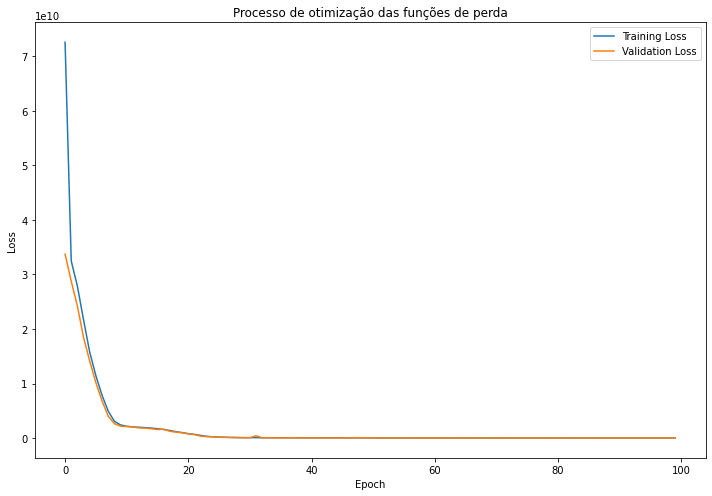

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(history.history['loss'], label='Training Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')

ax.set(
    title='Processo de otimização das funções de perda',
    ylabel='Loss',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

63/63 [==============================] - 0s 2ms/step


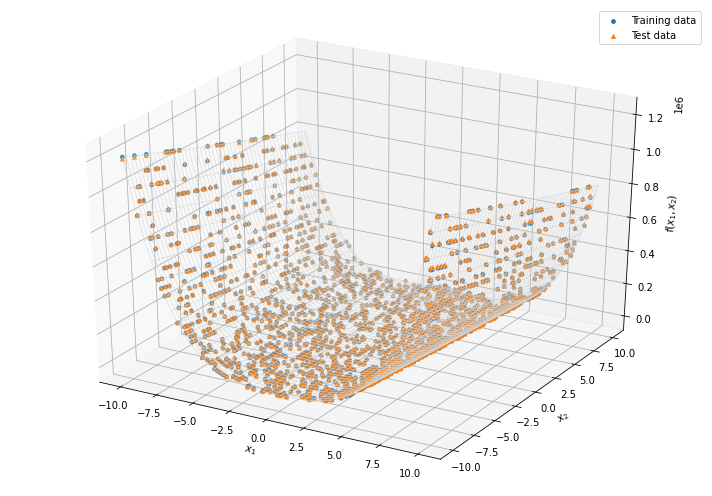

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(projection='3d'))

ax.plot_wireframe(x1, x2, z, linewidths=0.5, color='lightgrey')
ax.scatter(x_test[:,0], x_test[:,1], y_test, s=14, color='C0', label='Training data')
ax.scatter(x_test[:,0], x_test[:,1], mlp.predict(x_test), s=15, marker='^', color='C1', label='Test data')

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.legend()
plt.tight_layout()
plt.show()


b) $f(x_1, x_2) = x_1^2 + x_2^2 + 2x_1x_2 cos(\pi x_1 x_2) + x_1 +x_2 - 1 \hspace{1cm} |x_1| \leq 1, |x_2| \leq 1$

In [ ]:
# b
x1, x2 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
z =  x1**2 + x2**2 + 2 * x1 * x2 * np.cos(np.pi * x1 * x2) + x1 + x2 - 1

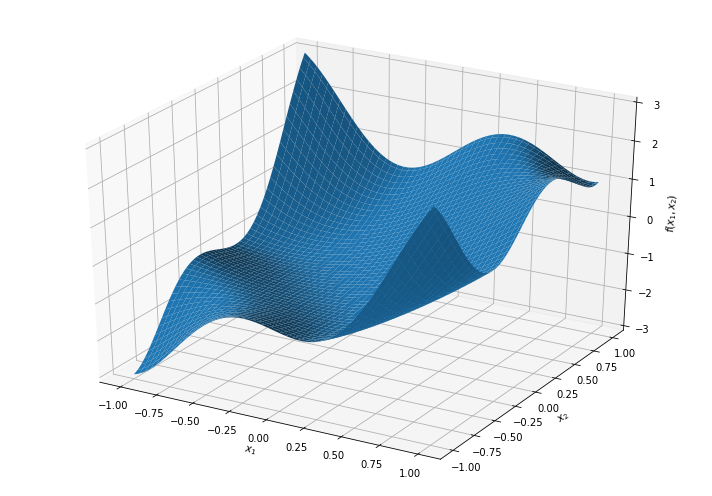

In [ ]:
# graphic b
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(projection='3d'))
ax.plot_surface(x1, x2, z)

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.tight_layout()
plt.show()

In [ ]:
# split train and test
x_train, x_test, y_train, y_test = train_test_split(
    np.vstack([x1.flatten(), x2.flatten()]).T, 
    z.flatten(), 
    test_size=0.2, 
    random_state=505
)

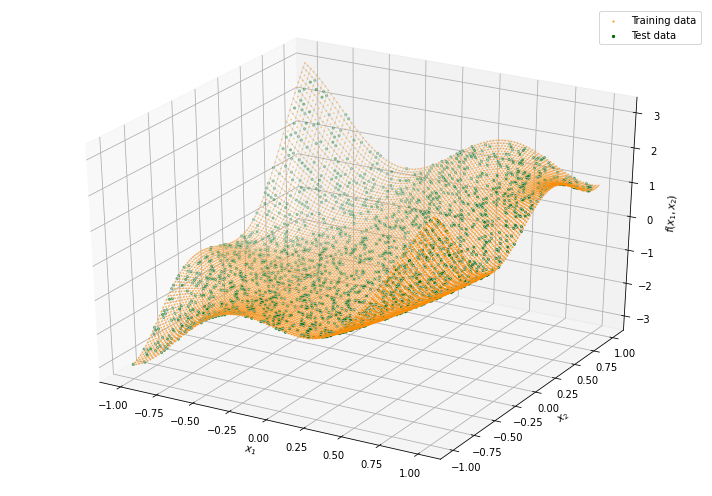

In [ ]:
# graphic before train_test_split
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(projection='3d'))

ax.plot_wireframe(x1, x2, z, linewidths=0.5, color='lightgrey')
ax.scatter(x_train[:,0], x_train[:,1], y_train, s=1, color='darkorange', label='Training data')
ax.scatter(x_test[:,0], x_test[:,1], y_test, s=5, color='darkgreen', label='Test data')

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# mlp model
mlp = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')
])

mlp.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

mlp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                192       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dense_10 (Dense)            (None, 4)                 36        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 2,977
Trainable params: 2,977
Non-traina

In [ ]:
history = mlp.fit(
    x_train, y_train,
    batch_size=8,
    epochs=100,
    validation_split=0.1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
    ]
)

Epoch 1/100
900/900 [==============================] - 3s 3ms/step - loss: 0.1518 - val_loss: 0.0380 - lr: 0.0010
Epoch 2/100
900/900 [==============================] - 2s 3ms/step - loss: 0.0230 - val_loss: 0.0202 - lr: 0.0010
Epoch 3/100
900/900 [==============================] - 2s 3ms/step - loss: 0.0119 - val_loss: 0.0107 - lr: 0.0010
Epoch 4/100
900/900 [==============================] - 2s 3ms/step - loss: 0.0061 - val_loss: 0.0037 - lr: 0.0010
Epoch 5/100
900/900 [==============================] - 2s 3ms/step - loss: 0.0049 - val_loss: 0.0021 - lr: 0.0010
Epoch 6/100
900/900 [==============================] - 2s 3ms/step - loss: 0.0047 - val_loss: 8.8958e-04 - lr: 0.0010
Epoch 7/100
900/900 [==============================] - 2s 3ms/step - loss: 0.0022 - val_loss: 0.0017 - lr: 0.0010
Epoch 8/100
900/900 [==============================] - 2s 3ms/step - loss: 0.0037 - val_loss: 0.0038 - lr: 0.0010
Epoch 9/100
900/900 [==============================] - 3s 3ms/step - loss: 0.0023 - 

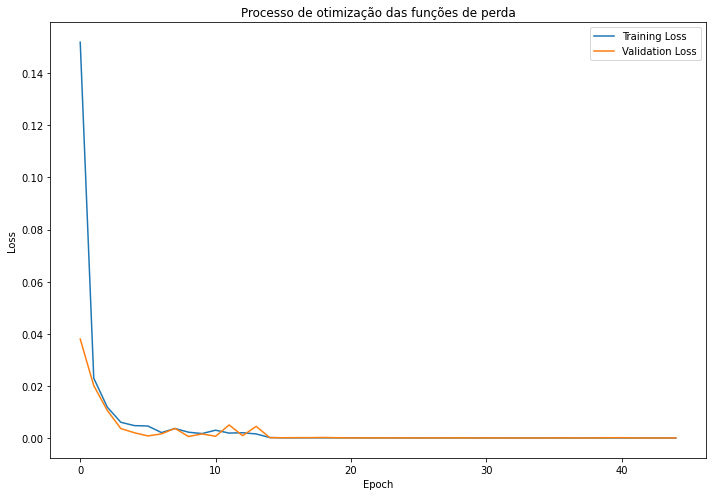

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(history.history['loss'], label='Training Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')

ax.set(
    title='Processo de otimização das funções de perda',
    ylabel='Loss',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

63/63 [==============================] - 0s 907us/step


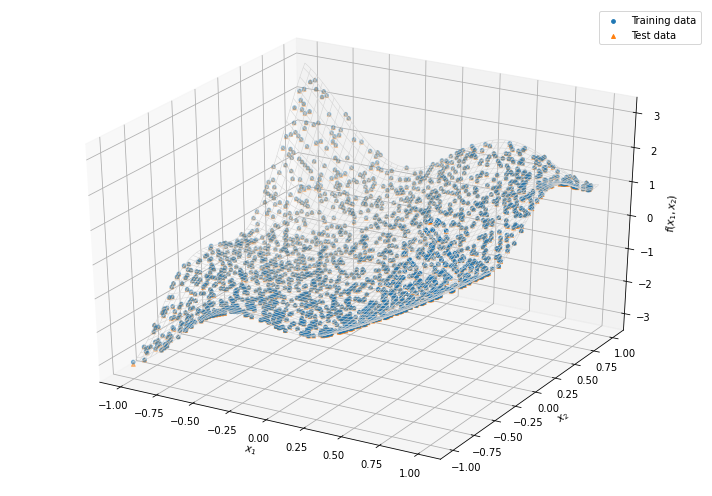

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(projection='3d'))

ax.plot_wireframe(x1, x2, z, linewidths=0.5, color='lightgrey')
ax.scatter(x_test[:,0], x_test[:,1], y_test, s=14, color='C0', label='Training data')
ax.scatter(x_test[:,0], x_test[:,1], mlp.predict(x_test), s=15, marker='^', color='C1', label='Test data')

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.legend()
plt.tight_layout()
plt.show()

## Question 2


In [ ]:
# classes
def c1(x, y):
  return 1 if (x + 1)**2 + y**2 <= 1 == True else 0

def c2(x, y):
  return 1 if (x - 1)**2 + y**2 <= 1 == True else 0

def c3(x, y):
  return 1 if x**2 + (y + 1)**2 <= 1 == True else 0

def c4(x, y):
  return 1 if x**2 + (y - 1)**2 <= 1 == True else 0

In [ ]:
x, y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))

labels = []
points = np.vstack(list(zip(x.ravel(), y.ravel())))
for x_i, y_i in points: 
  if (c1(x_i, y_i) + c3(x_i, y_i))>=2: # third q
    labels.append(1)
  elif (c2(x_i, y_i) + c4(x_i, y_i))>=2: # first q
    labels.append(2)
  elif (c3(x_i, y_i) + c2(x_i, y_i))>=2:
    labels.append(3)
  elif (c1(x_i, y_i) + c4(x_i, y_i))>=2: # second q
    labels.append(4)
  else:
    labels.append(0)
labels = np.array(labels)

In [ ]:
1 in labels

True

In [ ]:
2 in labels

True

In [ ]:
3 in labels

True

In [ ]:
4 in labels

True

In [ ]:
3 in labels

True

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(points, labels, test_size=0.2, stratify=labels)

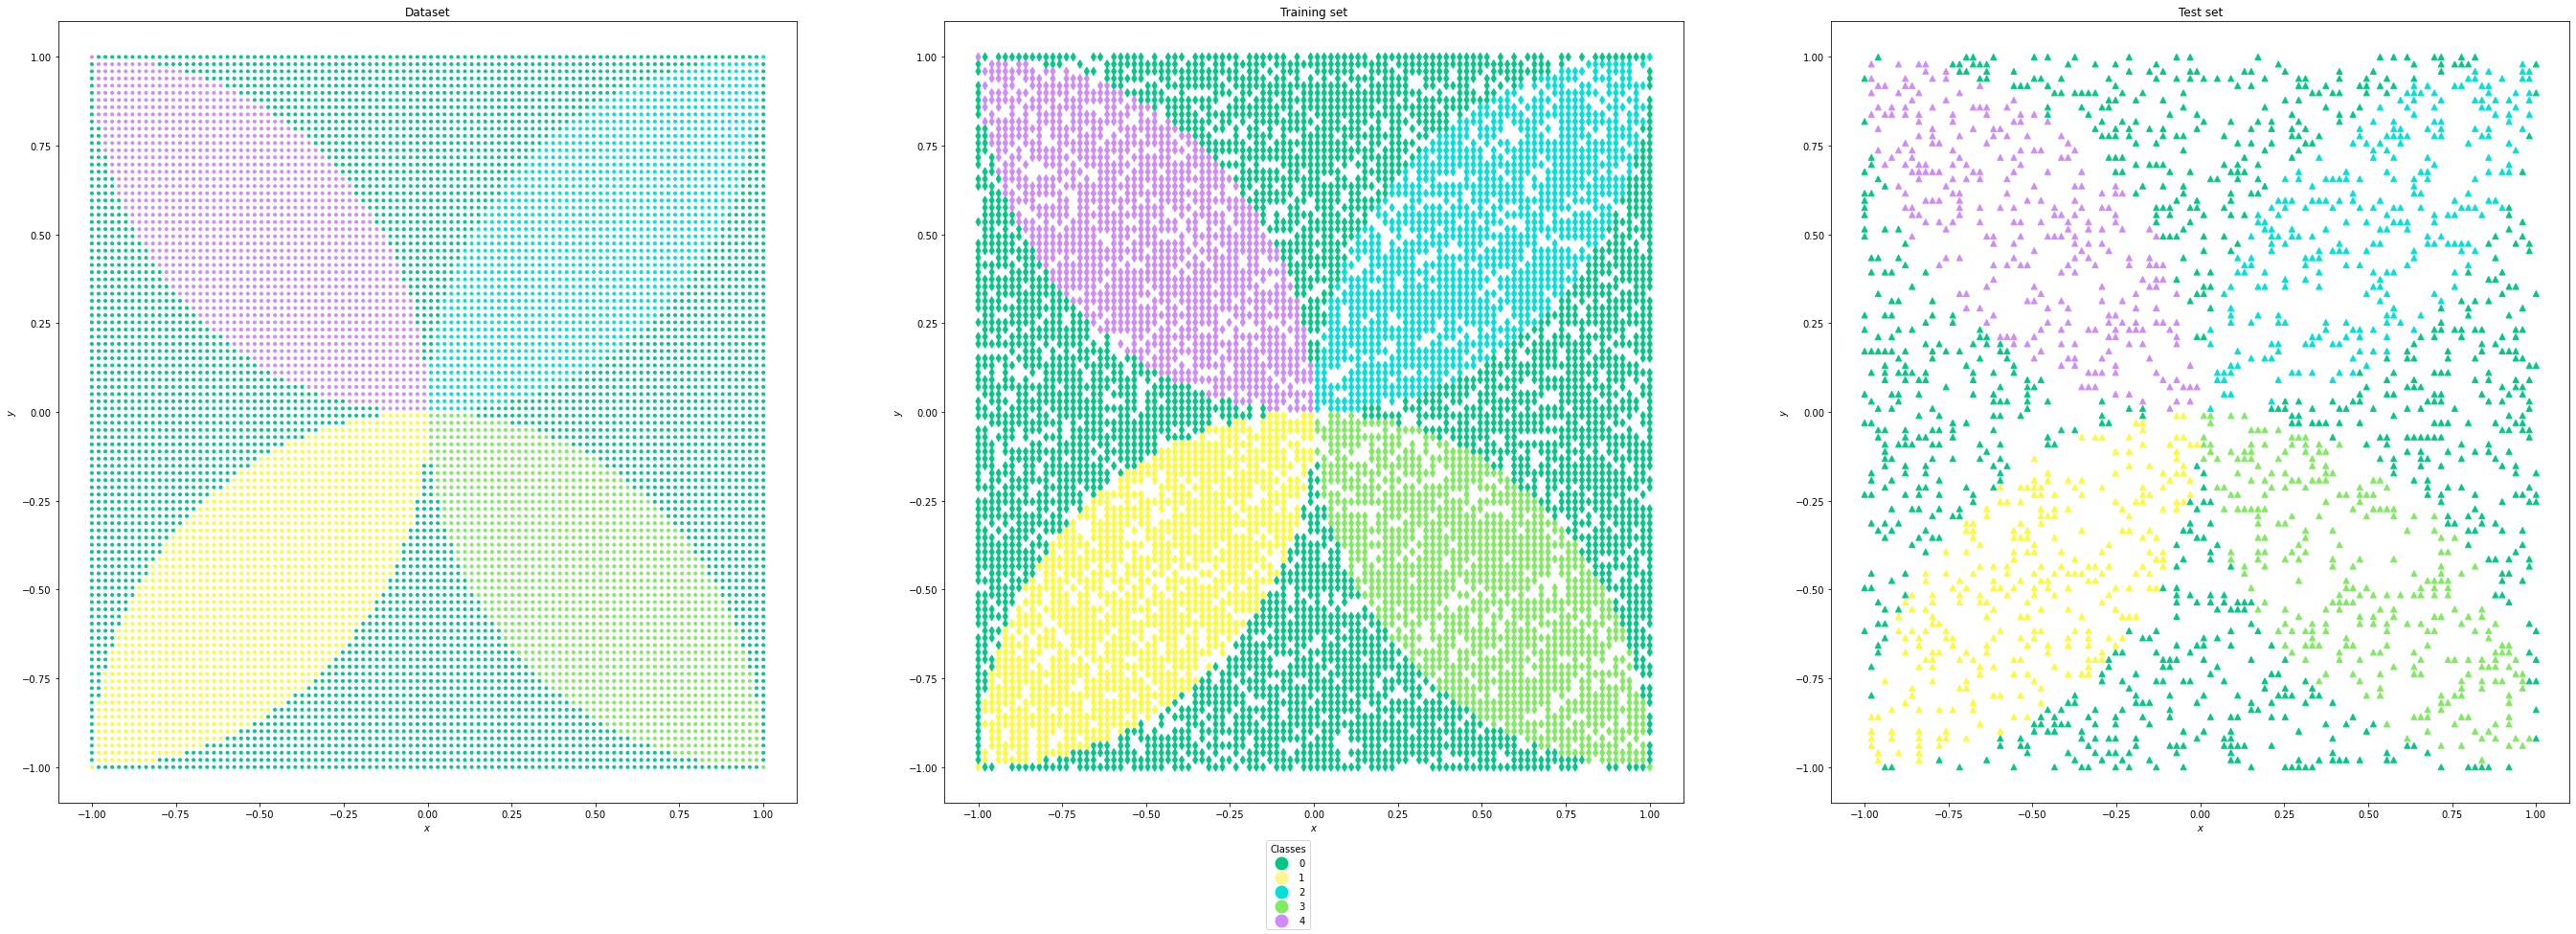

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(47, 15))

cmap = np.array([(3/255, 200/255, 133/255), 
                 (253/255, 250/255, 57/255), 
                 (1/255, 225/255, 218/255), 
                 (128/255, 235/255, 97/255), 
                 (207/255, 139/255, 251/255)])

dataset_scatter = ax[0].scatter(points[:,0], points[:,1], c=cmap[labels], marker='.')

ax[0].set(
    title='Dataset',
    xlabel='$x$',
    ylabel='$y$'
)

ax[1].scatter(x_train[:,0], x_train[:,1], c=cmap[y_train], marker='d')

ax[1].set(
    title='Training set',
    xlabel='$x$',
    ylabel='$y$'
)

ax[2].scatter(x_test[:,0], x_test[:,1], c=cmap[y_test], marker='^')

ax[2].set(
    title='Test set',
    xlabel='$x$',
    ylabel='$y$'
)

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor=(3/255, 200/255, 133/255), markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor=(255/255, 245/255, 140/255), markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor=(1/255, 225/255, 218/255), markersize=15), 
    Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor=(128/255, 235/255, 97/255), markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor=(207/255, 139/255, 251/255), markersize=15)
]

fig.legend(
    legend_elements,
    ['0', '1','2','3','4'],
    loc='lower center',
    title='Classes'
)

plt.show()

## Question 3 [Transfer Learning on CIFAR-10] - RESNET

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(y_train.reshape((-1,1)))

In [4]:
input_shape = x_train.shape[1:]
n_classes = y_train[0].shape[0]

In [5]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
len(classes)

10

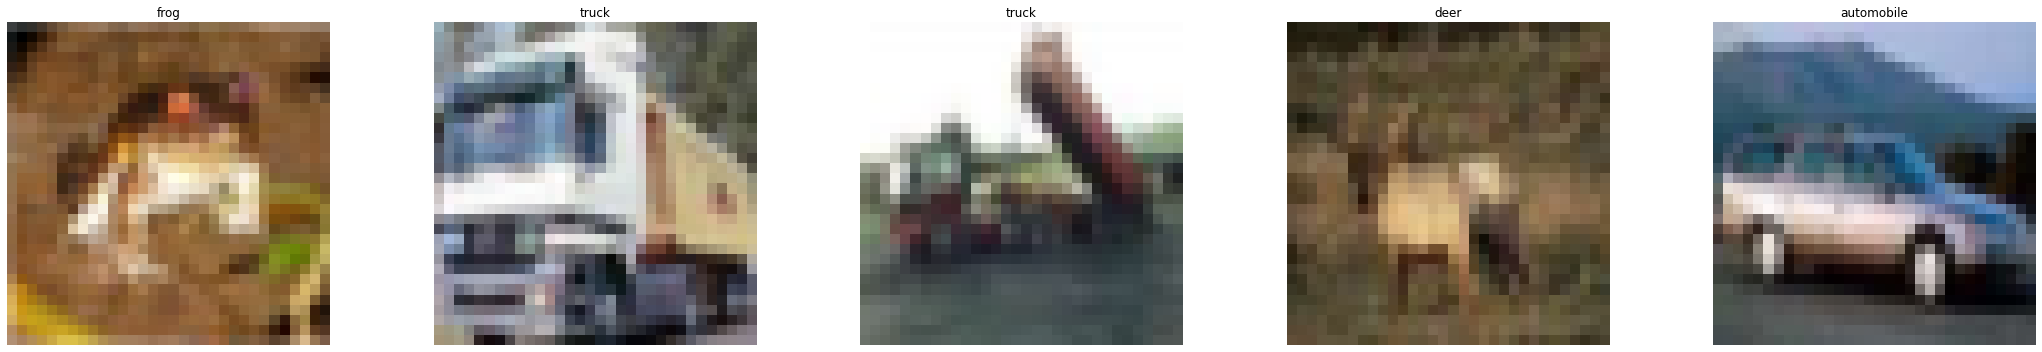

In [6]:
fig, ax = plt.subplots(ncols=5, figsize=(30, 5))

for idx, image in enumerate(x_train[:5]):

    ax[idx].imshow(image, cmap='gray')
    ax[idx].axis('off')

    ax[idx].set_title(f'{classes[np.argmax(y_train[idx])]}')

plt.tight_layout()
plt.show()

In [6]:
resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in resnet50.layers:
    layer.trainable = True

X = resnet50.output
X = Flatten()(X)

X = Dense(512, kernel_initializer='he_uniform')(X)
X = Dropout(.2)(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

# X = Dense(256, kernel_initializer='he_uniform')(X)
# X = Dropout(.2)(X)
# X = BatchNormalization()(X)
# X = Activation('relu')(X)

# X = Dense(128, kernel_initializer='he_uniform')(X)
# X = Dropout(.2)(X)
# X = BatchNormalization()(X)
# X = Activation('relu')(X)

X = Dense(64, kernel_initializer='he_uniform')(X)
X = Dropout(.2)(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

output = Dense(n_classes, activation='softmax')(X)

resnet50_model = Model(inputs=resnet50.input, outputs=output)

resnet50_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001), 
    metrics=['acc']
)

94765736/94765736 [==============================] - 0s 0us/step


In [7]:
# Train the whole network
history1 = resnet50_model.fit(
    x_train, y_train,
    validation_split=0.1,
    batch_size=64,
    epochs=20,
    shuffle=True,
    callbacks=[
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.0001)
    ]
)

Epoch 1/20
704/704 [==============================] - 50s 49ms/step - loss: 1.4019 - acc: 0.5329 - val_loss: 0.8403 - val_acc: 0.7238 - lr: 1.0000e-04
Epoch 2/20
704/704 [==============================] - 32s 45ms/step - loss: 0.7921 - acc: 0.7495 - val_loss: 0.6626 - val_acc: 0.7820 - lr: 1.0000e-04
Epoch 3/20
704/704 [==============================] - 32s 46ms/step - loss: 0.5648 - acc: 0.8258 - val_loss: 0.6356 - val_acc: 0.7936 - lr: 1.0000e-04
Epoch 4/20
704/704 [==============================] - 33s 47ms/step - loss: 0.4230 - acc: 0.8715 - val_loss: 0.6354 - val_acc: 0.7986 - lr: 1.0000e-04
Epoch 5/20
704/704 [==============================] - 32s 46ms/step - loss: 0.3266 - acc: 0.9018 - val_loss: 0.6337 - val_acc: 0.8062 - lr: 1.0000e-04
Epoch 6/20
704/704 [==============================] - 32s 46ms/step - loss: 0.2624 - acc: 0.9222 - val_loss: 0.6401 - val_acc: 0.8022 - lr: 1.0000e-04
Epoch 7/20
704/704 [==============================] - 32s 46ms/step - loss: 0.1989 - acc: 0.94

In [9]:
# Freeze core ResNet layers and train again 
for layer in resnet50_model.layers:
    layer.trainable = False

for layer in resnet50_model.layers[:200]:
    layer.trainable = True

resnet50_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001), 
    metrics=['acc']
)

history2 = resnet50_model.fit(
    x_train, y_train,
    validation_split=0.1,
    batch_size=64,
    epochs=1000,
    shuffle=True,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=10),
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
    ]
)

Epoch 1/1000
704/704 [==============================] - 39s 48ms/step - loss: 0.0588 - acc: 0.9824 - val_loss: 0.7987 - val_acc: 0.8250 - lr: 1.0000e-04
Epoch 2/1000
704/704 [==============================] - 32s 46ms/step - loss: 0.0491 - acc: 0.9849 - val_loss: 0.8296 - val_acc: 0.8186 - lr: 1.0000e-04
Epoch 3/1000
704/704 [==============================] - 32s 46ms/step - loss: 0.0548 - acc: 0.9836 - val_loss: 0.7779 - val_acc: 0.8282 - lr: 1.0000e-04
Epoch 4/1000
704/704 [==============================] - 32s 46ms/step - loss: 0.0424 - acc: 0.9872 - val_loss: 0.8316 - val_acc: 0.8296 - lr: 1.0000e-04
Epoch 5/1000
704/704 [==============================] - 32s 46ms/step - loss: 0.0441 - acc: 0.9869 - val_loss: 0.8410 - val_acc: 0.8206 - lr: 1.0000e-04
Epoch 6/1000
704/704 [==============================] - 32s 46ms/step - loss: 0.0489 - acc: 0.9858 - val_loss: 0.7811 - val_acc: 0.8364 - lr: 1.0000e-04
Epoch 7/1000
704/704 [==============================] - 32s 46ms/step - loss: 0.04

In [ ]:
# Merge history1 and history2
history = {
    'loss': history1.history['loss'] + history2.history['loss'],
    'acc': history1.history['acc'] + history2.history['acc'],
    'val_loss': history1.history['val_loss'] + history2.history['val_loss'],
    'val_acc': history1.history['val_acc'] + history2.history['val_acc']
}

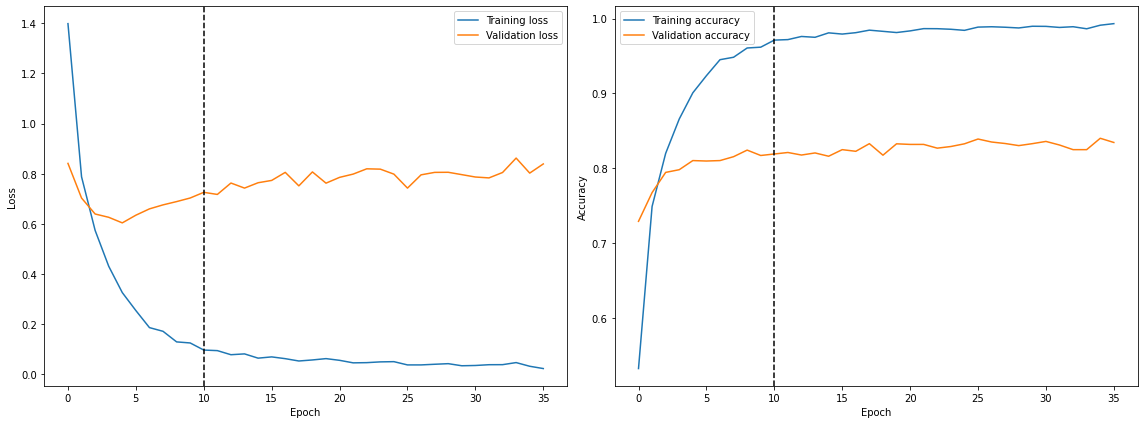

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 6))

ax[0].plot(history['loss'], label='Training loss')
ax[0].plot(history['val_loss'], label='Validation loss')
ax[0].axvline(x=10, color='k', linestyle='--')

ax[0].legend()
ax[0].set(
    ylabel='Loss',
    xlabel='Epoch'
)

ax[1].plot(history['acc'], label='Training accuracy')
ax[1].plot(history['val_acc'], label='Validation accuracy')
ax[1].axvline(x=10, color='k', linestyle='--')

ax[1].set(
    ylabel='Accuracy',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
y_pred = [ np.argmax(pred) for pred in resnet50_model.predict(x_test) ]

313/313 [==============================] - 4s 11ms/step


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1000
           1       0.87      0.90      0.89      1000
           2       0.81      0.76      0.78      1000
           3       0.69      0.66      0.67      1000
           4       0.77      0.85      0.81      1000
           5       0.74      0.76      0.75      1000
           6       0.81      0.90      0.85      1000
           7       0.90      0.82      0.86      1000
           8       0.89      0.90      0.90      1000
           9       0.89      0.84      0.86      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



## Question 4 [NARX]
One step prediction $x^{(n+1)}$ from the time series 
$x(n) = 1 + cos(n + cos^2(n))$, where $n=0,1,2,3,...$ 
1. Generate a set of samples for training, defining the
prediction error to $e^{(n+1)}=x(n+1)-x^{(n+1)}$ 
2. Evaluate performance by showing curve, time series, prediction curve and prediction error curve

### Data

In [ ]:
n = np.linspace(0, 100, 10000)
y = 1 + np.cos(n + np.cos(n)**2)

### Test and train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(n, y, random_state=33, test_size=0.25)

In [ ]:
print(f'Shape X_train = {X_train.shape}')
print(f'Shape y_train = {y_train.shape}')
print(f'Shape X_test = {X_test.shape}')
print(f'Shape y_test = {y_test.shape}')

Shape X_train = (7500,)
Shape y_train = (7500,)
Shape X_test = (2500,)
Shape y_test = (2500,)


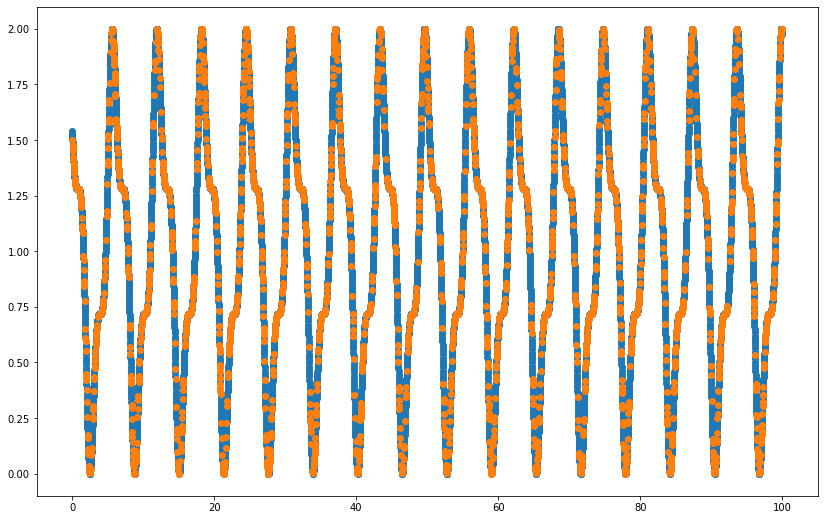

In [ ]:
fig, ax = plt.subplots(figsize=(14,9))

ax.scatter(X_train, y_train)
ax.scatter(X_test, y_test)

plt.show()

In [ ]:
sequence_x = list(TimeseriesGenerator(X_train, X_train, 4, batch_size=1))
sequence_y = list(TimeseriesGenerator(X_train[4:], X_train[4:], 3, batch_size=1))

train_seqs = []
y_train = []
for (x_seq, next_x), (next_seq, _) in zip(sequence_x, sequence_y):
    seq = np.append(x_seq.reshape(4,), next_seq.reshape(3, ))
    
    train_seqs.append(seq)
    y_train.append(next_x)

train_seqs = np.array(train_seqs)
y_train = np.array(y_train)

In [ ]:
sequence_x = list(TimeseriesGenerator(X_test, X_test, 4, batch_size=1))
sequence_y = list(TimeseriesGenerator(X_test[4:], X_test[4:], 3, batch_size=1))

test_seqs = []
y_test = []
for (x_seq, next_x), (next_seq, _) in zip(sequence_x, sequence_y):
    seq = np.append(x_seq.reshape(4,), next_seq.reshape(3, ))
    
    test_seqs.append(seq)
    y_test.append(next_x)

test_seqs = np.array(test_seqs)
y_test = np.array(y_test)

### RNN

In [ ]:
model = Sequential([
    LSTM(128, input_shape=(7, 1), return_sequences=True),
    LSTM(64),
    Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="adam")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(
    train_seqs, y_train,
    validation_split=0.1,
    batch_size=8,
    epochs=100,
    shuffle=True,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=5),
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
    ]
)

Epoch 1/100
843/843 [==============================] - 12s 14ms/step - loss: 0.0411 - val_loss: 0.0396 - lr: 1.0000e-04
Epoch 2/100
843/843 [==============================] - 11s 14ms/step - loss: 0.0272 - val_loss: 0.0300 - lr: 1.0000e-04
Epoch 3/100
843/843 [==============================] - 11s 14ms/step - loss: 0.0231 - val_loss: 0.0279 - lr: 1.0000e-04
Epoch 4/100
843/843 [==============================] - 16s 19ms/step - loss: 0.0223 - val_loss: 0.0248 - lr: 1.0000e-04
Epoch 5/100
843/843 [==============================] - 12s 14ms/step - loss: 0.0215 - val_loss: 0.0282 - lr: 1.0000e-04
Epoch 6/100
843/843 [==============================] - 11s 13ms/step - loss: 0.0189 - val_loss: 0.0209 - lr: 1.0000e-04
Epoch 7/100
843/843 [==============================] - 12s 14ms/step - loss: 0.0173 - val_loss: 0.0246 - lr: 1.0000e-04
Epoch 8/100
843/843 [==============================] - 12s 14ms/step - loss: 0.0169 - val_loss: 0.0255 - lr: 1.0000e-04
Epoch 9/100
843/843 [===================

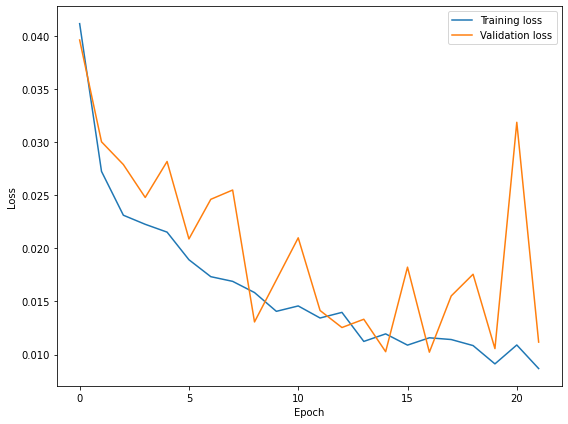

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(history.history['loss'], label='Training loss')
ax.plot(history.history['val_loss'], label='Validation loss')

ax.legend()
ax.set(
    ylabel='Loss',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
y_pred = model.predict(test_seqs)

78/78 [==============================] - 1s 8ms/step


<>:13: DeprecationWarning: invalid escape sequence \h


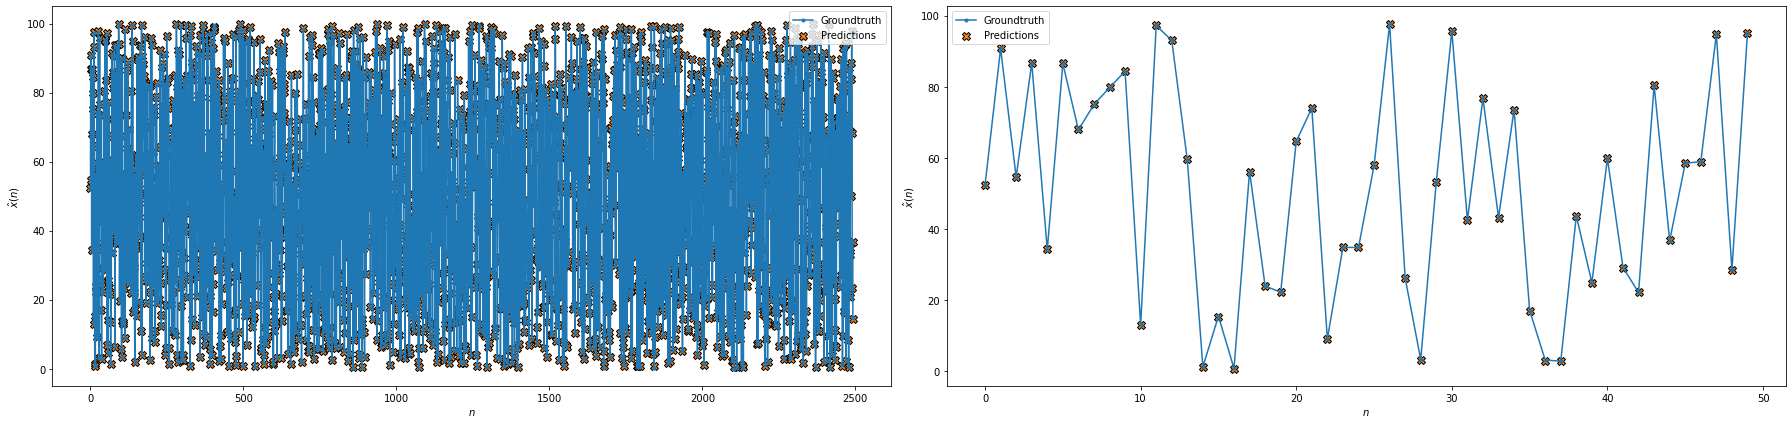

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(25, 6))

axes[0].plot(y_test, marker='.', label='Groundtruth')
axes[0].scatter(
    range(len(y_pred)), y_pred, 
    marker='X', edgecolors='k', 
    label='Predictions', c='#ff7f0e', 
    s=64
)

axes[0].legend()
axes[0].set(
    ylabel='$\hat{x}(n)$',
    xlabel='$n$'
)

axes[1].plot(y_test[:50], marker='.', label='Groundtruth')
axes[1].scatter(
    range(len(y_pred[:50])), y_pred[:50], 
    marker='X', edgecolors='k', 
    label='Predictions', c='#ff7f0e', 
    s=64
)

axes[1].legend()
axes[1].set(
    ylabel='$\hat{x}(n)$',
    xlabel='$n$'
)

plt.tight_layout()
plt.show()

## Question 5 [Four gaussian distributions]
Use an autoeconder network to reduce the dimensionality of data to two dimensions.

In [8]:
m1 = np.zeros(8)
m2 = np.array([4,0,0,0,0,0,0,0])
m3 = np.array([0,0,0,4,0,0,0,0])
m4 = np.array([0,0,0,0,0,0,0,4])

In [9]:
v = np.eye(8)
x1 = np.random.multivariate_normal(m1, v, 1500)
x2 = np.random.multivariate_normal(m2, v, 1500)
x3 = np.random.multivariate_normal(m3, v, 1500)
x4 = np.random.multivariate_normal(m4, v, 1500)

In [10]:
# autoencoder network
input_size = Input(shape=(8,))

encoder = Dense(512, activation='leaky_relu')(input_size)
encoder = Dense(512, activation='leaky_relu')(encoder)
encoder = Dropout(0.1)(encoder)
encoder = Dense(8, activation='tanh')(encoder)

decoder = Dense(512, activation='leaky_relu')(encoder)
decoder = Dropout(0.1)(decoder)
decoder = Dense(8, activation='tanh')(decoder)

In [11]:
model_autoencoder = Model(input_size, decoder)
model_encoder = Model(input_size, encoder)

In [13]:
model_autoencoder.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='mse',
)

model_autoencoder.fit(x1, x1, epochs=70, validation_split=0.1, shuffle=True)
model_autoencoder.fit(x2, x2, epochs=70, validation_split=0.1, shuffle=True)
model_autoencoder.fit(x3, x3, epochs=70, validation_split=0.1, shuffle=True)
model_autoencoder.fit(x4, x4, epochs=70, validation_split=0.1, shuffle=True)

Epoch 1/70
43/43 [==============================] - 2s 12ms/step - loss: 0.2024 - val_loss: 0.1695
Epoch 2/70
43/43 [==============================] - 0s 7ms/step - loss: 0.1926 - val_loss: 0.1650
Epoch 3/70
43/43 [==============================] - 0s 8ms/step - loss: 0.1883 - val_loss: 0.1618
Epoch 4/70
43/43 [==============================] - 0s 7ms/step - loss: 0.1861 - val_loss: 0.1594
Epoch 5/70
43/43 [==============================] - 0s 6ms/step - loss: 0.1833 - val_loss: 0.1581
Epoch 6/70
43/43 [==============================] - 0s 9ms/step - loss: 0.1823 - val_loss: 0.1570
Epoch 7/70
43/43 [==============================] - 0s 4ms/step - loss: 0.1812 - val_loss: 0.1559
Epoch 8/70
43/43 [==============================] - 0s 4ms/step - loss: 0.1799 - val_loss: 0.1549
Epoch 9/70
43/43 [==============================] - 0s 4ms/step - loss: 0.1792 - val_loss: 0.1544
Epoch 10/70
43/43 [==============================] - 0s 4ms/step - loss: 0.1780 - val_loss: 0.1532
Epoch 11/70
43/43 

In [17]:
encoded_x1 = model_encoder.predict(x1)
encoded_x2 = model_encoder.predict(x2)
encoded_x3 = model_encoder.predict(x3)
encoded_x4 = model_encoder.predict(x4)

47/47 [==============================] - 0s 2ms/step


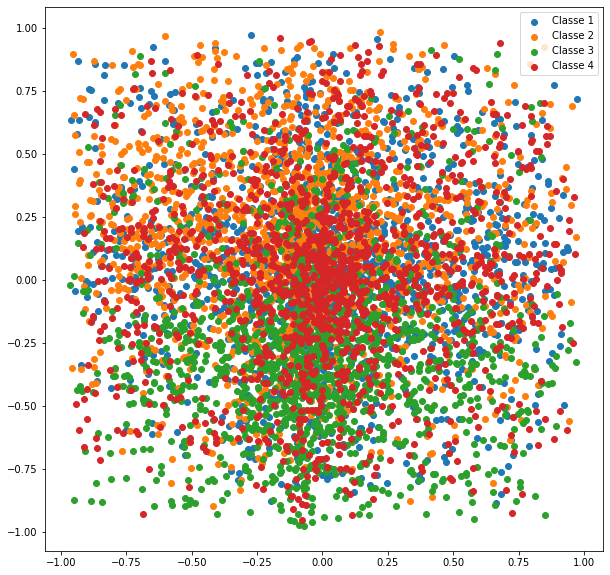

In [19]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(encoded_x1[:, 0][0:2000], encoded_x1[:, 1][0:2000], label='Classe 1')
ax.scatter(encoded_x2[:, 0][0:2000], encoded_x2[:, 1][0:2000], label='Classe 2')
ax.scatter(encoded_x3[:, 0][0:2000], encoded_x3[:, 1][0:2000], label='Classe 3')
ax.scatter(encoded_x4[:, 0][0:2000], encoded_x4[:, 1][0:2000], label='Classe 4')

ax.legend()
plt.show()

## Question 6 [LSTM]

Source: [IG Tech Team](https://www.youtube.com/watch?v=VB7bbFIEAhk&ab_channel=IGTechTeam)

### Download the file

In [ ]:
!gdown https://drive.google.com/uc?id=16YVKFWB3yZxs5WoKRnmIz4CBbSxSi3ue

Downloading...
From: https://drive.google.com/uc?id=16YVKFWB3yZxs5WoKRnmIz4CBbSxSi3ue
To: /content/book_pride_and_prejudice.txt
100% 725k/725k [00:00<00:00, 133MB/s]


### Open and Pre-process the data

In [ ]:
file = open("book_pride_and_prejudice.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines) 

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces 
data = data.split()
data = ' '.join(data)
data[:500]

'The Project Gutenberg eBook, Pride and Prejudice, by Jane Austen, Edited by R. W. (Robert William) Chapman This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org Title: Pride and Prejudice Author: Jane Austen Editor: R. W. (Robert William) Chapman Release Date: May 9, 2013 [eBook #42671] Language: English '

In [ ]:
len(data)

704792

### Apply tokenization and some other changes

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[1, 178, 157, 1173, 290, 4, 877, 30, 73, 3195, 4176, 30, 3196, 2163, 3197]

In [ ]:
len(sequence_data)

126018

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

6736


In [ ]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  126015


array([[   1,  178,  157, 1173],
       [ 178,  157, 1173,  290],
       [ 157, 1173,  290,    4],
       [1173,  290,    4,  877],
       [ 290,    4,  877,   30],
       [   4,  877,   30,   73],
       [ 877,   30,   73, 3195],
       [  30,   73, 3195, 4176],
       [  73, 3195, 4176,   30],
       [3195, 4176,   30, 3196]])

In [ ]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])
    
X = np.array(X)
y = np.array(y)

In [ ]:
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[   1  178  157]
 [ 178  157 1173]
 [ 157 1173  290]
 [1173  290    4]
 [ 290    4  877]
 [   4  877   30]
 [ 877   30   73]
 [  30   73 3195]
 [  73 3195 4176]
 [3195 4176   30]]
Response:  [1173  290    4  877   30   73 3195 4176   30 3196]


In [ ]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Creating the model

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             67360     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 6736)              6742736   
                                                                 
Total params: 19,859,096
Trainable params: 19,859,096
Non-trainable params: 0
_________________________________________________________________


### Plot the model

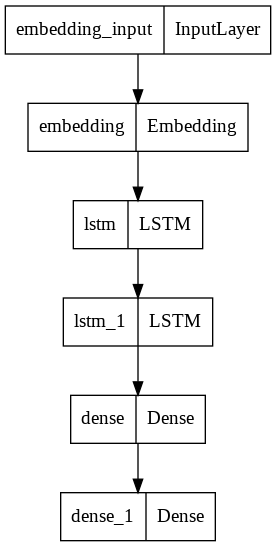

In [ ]:
keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

### Train the model

In [ ]:
checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=70, batch_size=64, callbacks=[checkpoint])

Epoch 1/70
1967/1969 [============================>.] - ETA: 0s - loss: 6.2213
Epoch 1: loss improved from inf to 6.22144, saving model to next_words.h5
1969/1969 [==============================] - 38s 15ms/step - loss: 6.2214
Epoch 2/70
1967/1969 [============================>.] - ETA: 0s - loss: 5.5928
Epoch 2: loss improved from 6.22144 to 5.59246, saving model to next_words.h5
1969/1969 [==============================] - 31s 16ms/step - loss: 5.5925
Epoch 3/70
1968/1969 [============================>.] - ETA: 0s - loss: 5.2346
Epoch 3: loss improved from 5.59246 to 5.23473, saving model to next_words.h5
1969/1969 [==============================] - 31s 16ms/step - loss: 5.2347
Epoch 4/70
1966/1969 [============================>.] - ETA: 0s - loss: 4.9941
Epoch 4: loss improved from 5.23473 to 4.99407, saving model to next_words.h5
1969/1969 [==============================] - 30s 15ms/step - loss: 4.9941
Epoch 5/70
1968/1969 [============================>.] - ETA: 0s - loss: 4.7817
E

### Prediction

In [ ]:
# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""
  
  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break
  
  print(predicted_word)
  return predicted_word

In [ ]:
while(True):
  text = input("Enter your line: ")
  
  if text == "0":
      print("Execution completed.....")
      break
  
  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)
        
          Predict_Next_Words(model, tokenizer, text)
          
      except Exception as e:
        print("Error occurred: ",e)
        continue

Enter your line: The Project Gutenberg eBook
['Project', 'Gutenberg', 'eBook']
1/1 [==============================] - 2s 2s/step
pride
Enter your line: The Project Gutenberg eBook, Pride
['Gutenberg', 'eBook,', 'Pride']
1/1 [==============================] - 1s 636ms/step
and
Enter your line: how can you abuse your own
['abuse', 'your', 'own']
1/1 [==============================] - 0s 15ms/step
children
Enter your line: He was quite
['He', 'was', 'quite']
1/1 [==============================] - 0s 17ms/step
young
Enter your line:  He could not help seeing that you were about five times as
['five', 'times', 'as']
1/1 [==============================] - 0s 16ms/step
pretty
Enter your line: Mrs. Hurst and her sister
['and', 'her', 'sister']
1/1 [==============================] - 0s 16ms/step
scarcely
Enter your line: Elizabeth preserved as steady a
['as', 'steady', 'a']
1/1 [==============================] - 0s 15ms/step
silence
Enter your line: however, it may all come to
['all', 'come', '

## Question 7 [Transfer Learning application]

**Article:** [Ftl-CoV19: A Transfer Learning Approach to Detect COVID-19](https://downloads.hindawi.com/journals/cin/2022/1953992.pdf)

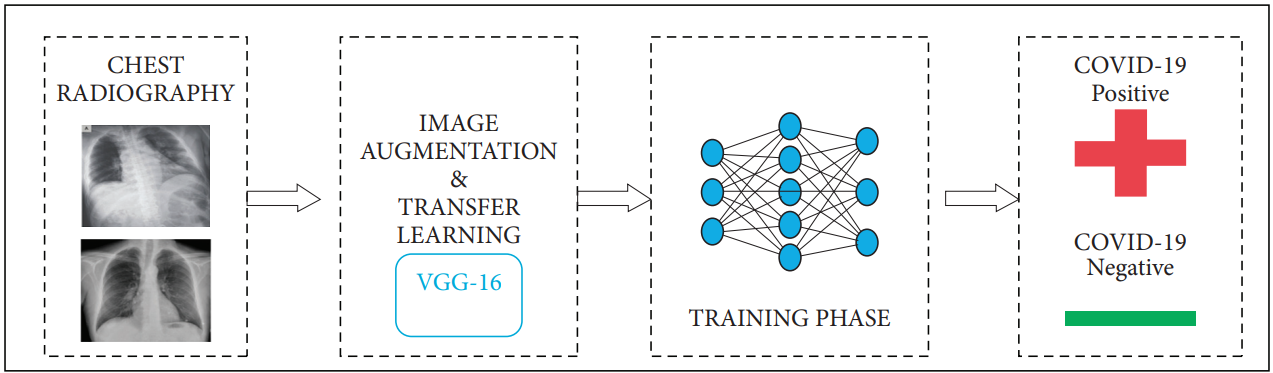
Source: Saurabh et al. [2022]



**English version**

The article study a transfer learning approach to detect COVID-19. Initially, the contextualization of the face of the new coronavirus in the world since its emergence, the most common symptoms and risk factors that can cause the disease to worsen in certain individuals is presented. In this context, due to the lack of sufficient data and the high level of unpredictability, a standard model is not the best option. Thus, the study proposes the use of transfer learning, based on the pre-trained VGG-16 model, focusing on data with chest X-rays.

First, the article seeks to show the growth, challenges and consequences of COVID-19 in the world, emphasizing the role that artificial intelligence has to detect similar patterns and make predictions, including acting in the detection of diseases, in a way that can be obtained greater precision beyond the conventional tests already used. In addition, the authors present some studies carried out on a machine learning algorithm to analyze drugs and collaborate in the creation of means to contain the spread of the virus, for example, as explained by recent research carried out to detect COVID-19 through of artificial intelligence.

Thus, the approach proposed by the authors is a fine
tuning transfer learning-coronavirus (Ftl-CoV19), from four phases, which involve the dataset, pre-processing, training and detection. In the first phase, the data consist of chest radiographs and CT scans, with 1,281 being COVID-19 and 1,481 being normal diagnoses. After that, there is the data pre-processing, in which the images are modeled to the desired size, from 450 x 446 to 224 x 224, and selected so that blurry or annotated images can be discarded, for example, to facilitate training and data validation. In training, CNN and the pre-trained VGG16 are used together with transfer learning and fine tuning, whose ratio used was 80 : 20 for training and testing with 2210 images for training and 552 images for validation.

In this way, the proposed approach called Ftl-CoV19 was compared with other pre-trained models, such as ResNet50, InceptionV3 and Xception under very similar test conditions, and ended up achieving better results, with training and validation accuracy of 98.82% and 99.27%, respectively.

**Portuguese version**

O artigo estuda uma abordagem de transfer learning para detectar COVID-19 Inicialmente, é apresentada a contextualização sobre o enfrentamento do novo coronavírus no mundo desde o seu surgimento, sintomas mais comuns e fatores de risco que podem provocar o agravamento da doença em determinados indivíduos. Dentro desse contexto, em decorrência da ausência de dados suficientes e do alto nível de imprevisibilidade, um modelo padrão acaba não sendo a melhor opção. Assim, o estudo propõe a utilização de transfer learning, a partir do modelo pré-treinado VGG-16, tendo como base raios-X de toráx.

Primeiramente, o artigo busca mostrar o crescimento, os desafios e as consequências da COVID-19 no mundo, enfatizando o papel que a inteligência artificial possui para detectar padrões semelhantes e realizar predições, incluindo atuar na detecção de doenças, de forma que se possa obter uma maior precisão para além dos testes convencionais já utilizados. Além disso, os autores apresentam alguns estudos realizados à respeito de uma algoritmo de aprendizado de máquina para analisar medicamentos e colaborar na criação de meios para conter a propagação do vírus, por exemplo, tal como explana pesquisas recentes realizadas para detectar COVID-19 por meio de inteligência artificial. 

Com isso, a abordagem proposta pelos autores trata-se de uma técnica de ajuste fino de aprendizado de transferência de coronavírus 19 (Ftl-CoV19), a partir de quatro fases, as quais envolvem o conjunto de dados, o pré-processamento, o treinamento e a detecção. Na primeira fase, os dados consistem em radiografias de tórax e tomografias computadorizadas, com a presença de 1.281 sendo COVID-19 e 1.481 diagnósticos normais. Em seguida, tem-se o pré-processamento de dados, em que as imagens são modeladas pra o tamanho desejado, indo de 450 x 446 para 224 x 224, e selecionadas de forma que se possa descartar imagens borradas ou com anotações, por exemplo, para facilitar o treinamento e a validação dos dados. Já no treinamento, usa-se CNN e o VGG16 pré-treinado em conjunto com transfer learning and fine tuning, cuja proporção utilizada foi 80 : 20 para treinamento e teste com 2210 imagens para treinar e 552 imagens para validação.

Dessa forma, a abordagem proposta chamada de Ftl-CoV19 foi comparada com outros modelos pré-treinados, como ResNet50, InceptionV3 e Xception sob condições bastante parecidas de teste, e acabou alcançando melhores resultados, com precisão de treinamento e validação de 98,82% e 99,27%, respectivamente.

## Project [Pneumonia Detection using CNN]

Source: [Kaggle: Pneumonia Detection using CNN](https://www.kaggle.com/code/madz2000/pneumonia-detection-using-cnn-92-6-accuracy)

The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal). Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care. For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

### Loading the Dataset

In [ ]:
train = get_training_data('/content/drive/MyDrive/artificial_intelligence/chest_xray/train/')

test = get_training_data('/content/drive/MyDrive/artificial_intelligence/chest_xray/test/')

val = get_training_data('/content/drive/MyDrive/artificial_intelligence/chest_xray/val/')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


### Data Visualization & Preprocessing

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


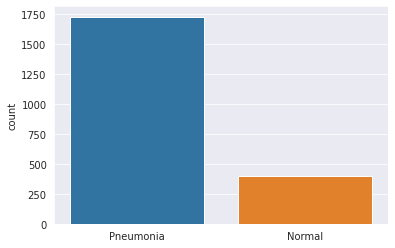

In [ ]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)

The data seems imbalanced. Solution: Data Augmentation

Text(0.5, 1.0, 'NORMAL')

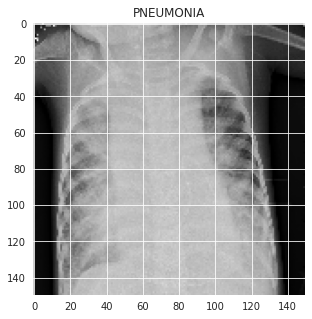

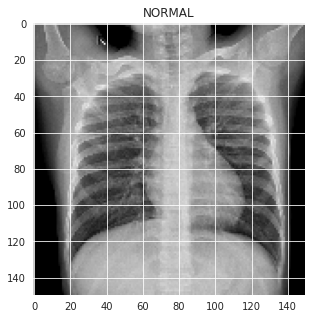

In [ ]:
# Previewing the images of both the classes
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [ ]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [ ]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [ ]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

### Data Augmentation

In [ ]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

For the data augmentation:

1. Randomly rotate some training images by 30 degrees
2. Randomly Zoom by 20% some training images
3. Randomly shift images horizontally by 10% of the width
4. Randomly shift images vertically by 10% of the height
5. Randomly flip images horizontally. Once our model is ready, we fit the training dataset.

### Training the Model

In [ ]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 150, 150, 32)      320       
                                                                 
 batch_normalization_5 (Batc  (None, 150, 150, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout_4 (Dropout)         (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_6 (Batc  (None, 75, 75, 64)      

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [ ]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 20 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/20
67/67 [==============================] - 7s 77ms/step - loss: 0.8254 - accuracy: 0.8199 - val_loss: 12.5577 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/20
67/67 [==============================] - 5s 74ms/step - loss: 0.3227 - accuracy: 0.8669 - val_loss: 51.1323 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/20
67/67 [==============================] - ETA: 0s - loss: 0.2573 - accuracy: 0.8886
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
67/67 [==============================] - 5s 74ms/step - loss: 0.2573 - accuracy: 0.8886 - val_loss: 104.3453 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/20
67/67 [==============================] - 5s 73ms/step - loss: 0.1527 - accuracy: 0.9403 - val_loss: 64.3176 - val_accuracy: 0.5000 - lr: 3.0000e-04
Epoch 5/20
67/67 [==============================] - ETA: 0s - loss: 0.1355 - accuracy: 0.9417
Epoch 5: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
67/67 [==============================] - 5s 74

In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 0s 15ms/step - loss: 0.6472 - accuracy: 0.8590
Loss of the model is -  0.647210419178009
20/20 [==============================] - 0s 12ms/step - loss: 0.6472 - accuracy: 0.8590
Accuracy of the model is -  85.89743375778198 %


### Analysis after Model Training

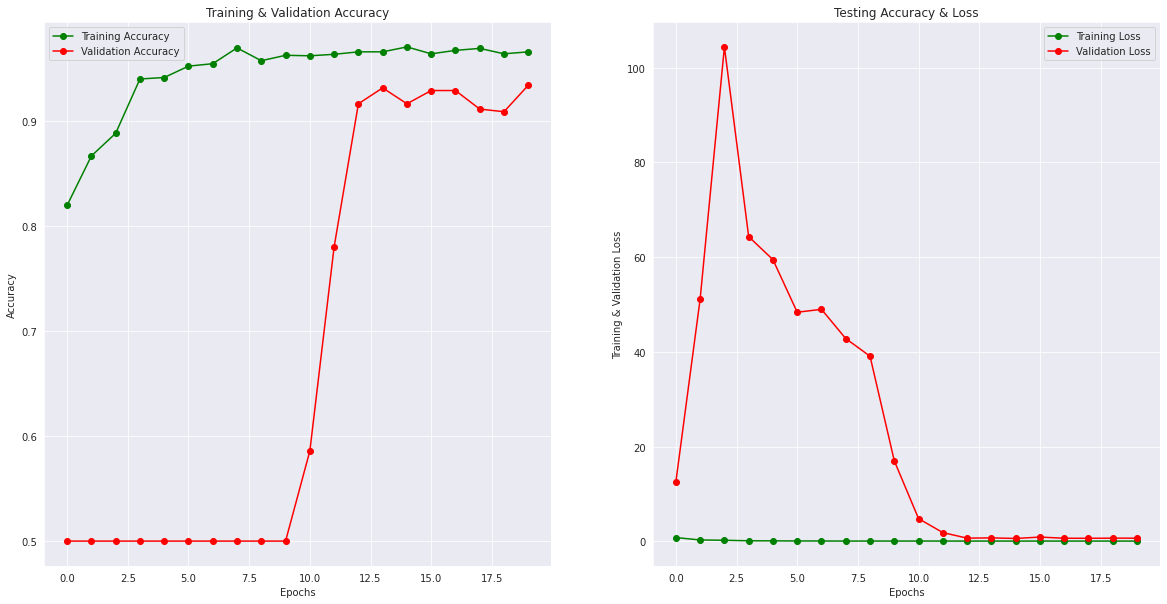

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [ ]:
predictions = model.predict(x_test)
predictions = np.where(predictions > 0.5, 1,0)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

20/20 [==============================] - 0s 12ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.86      0.93      0.89       390
   Normal (Class 1)       0.86      0.74      0.80       234

           accuracy                           0.86       624
          macro avg       0.86      0.84      0.84       624
       weighted avg       0.86      0.86      0.86       624



In [ ]:
cm = confusion_matrix(y_test,predictions)
cm

array([[363,  27],
       [ 61, 173]])

In [ ]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

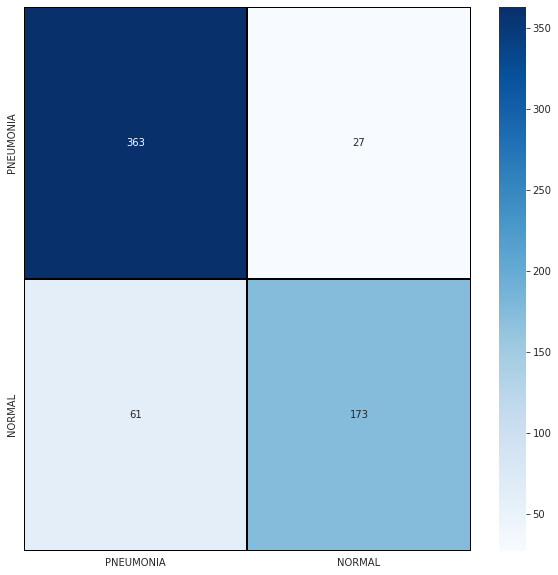

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [ ]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

### Some of the Correctly Predicted Classes

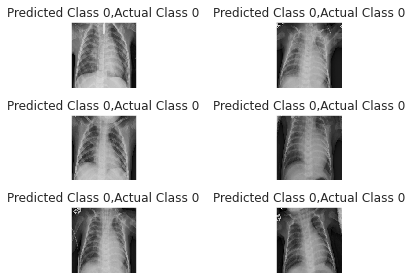

In [ ]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

### Some of the Incorrectly Predicted Classes

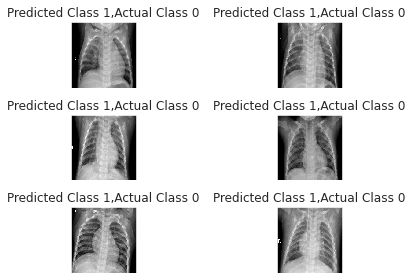

In [ ]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

## Project [GAN using CIFAR-10]


Source: [Kaggle - Generative Adversarial Networks - Demystified](https://www.kaggle.com/code/ibtesama/generative-adversarial-networks-demystified/notebook)

In [ ]:
# Load CIFAR10 data
(X_train, y_train), (_, _) = cifar10.load_data()

# Select a single class images (birds)
X_train = X_train[y_train.flatten() == 2]

In [ ]:
# Input shape
img_rows = 32
img_cols = 32
channels = 3
        
img_shape = (img_rows, img_cols, channels)        
latent_dim = 100

### The Generator

In [ ]:
def build_generator():

        model = Sequential()

        model.add(Dense(128 * 8 * 8, activation="relu", input_dim=latent_dim))
        model.add(Reshape((8, 8, 128)))
        
        model.add(UpSampling2D())#upsamples to 16*16*128
        
        model.add(Conv2D(128, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        
        model.add(UpSampling2D()) #upsamples to 32*32*128
        
        model.add(Conv2D(64, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        
        model.add(Conv2D(channels, kernel_size=3, padding="same"))
        model.add(Activation("tanh"))
        model.summary()
        #outputs an image of 32*32*3

        noise = Input(shape=(latent_dim,))
        img = model(noise)

        return Model(noise, img)

### The Discriminator

In [ ]:
def build_discriminator():

        model = Sequential()

        model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        #no normalization for the first layer 
        
        model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
        model.add(ZeroPadding2D(padding=((0,1),(0,1))))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        
        model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        
        model.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))
        model.summary()

        img = Input(shape=img_shape)
        validity = model(img)

        return Model(img, validity)

In [ ]:
# Build and compile the discriminator
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy',
            optimizer=Adam(0.0002,0.5),
            metrics=['accuracy'])

# Build the generator
generator = build_generator()

# The generator takes noise as input and generates imgs
z = Input(shape=(latent_dim,))
img = generator(z)

# For the combined model we will only train the generator
discriminator.trainable = False

# The discriminator takes generated images as input and determines validity
valid = discriminator(img)

# The combined model  (stacked generator and discriminator)
# Trains the generator to fool the discriminator
combined = Model(z, valid)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002,0.5))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 16, 16, 32)        896       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 16, 16, 32)        0         
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 zero_padding2d_2 (ZeroPaddi  (None, 9, 9, 64)         0         
 ng2D)                                                           
                                                                 
 batch_normalization_10 (Bat  (None, 9, 9, 64)         256       
 chNormalization)                                     

In [ ]:
def show_imgs(epoch):
        r, c = 4,4
        noise = np.random.normal(0, 1, (r * c,latent_dim))
        gen_imgs = generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,])
                axs[i,j].axis('off')
                cnt += 1
        plt.show()
        plt.close()

In [ ]:
def show_losses(losses):
    losses = np.array(losses)
    
    fig, ax = plt.subplots()
    plt.plot(losses.T[0], label='Discriminator')
    plt.plot(losses.T[1], label='Generator')
    plt.title("Training Losses")
    plt.legend()
    plt.show()

1/1 [==============================] - 0s 85ms/step
0 [D loss: 1.327108] [G loss: 0.599327]
1/1 [==============================] - 0s 85ms/step


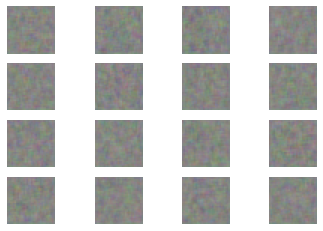

1/1 [==============================] - 0s 13ms/step


In [ ]:
epochs=3000
batch_size=32
display_interval=5000
losses=[]

#normalizing the input
X_train = X_train / 127.5 - 1.
        

# Adversarial ground truths
valid = np.ones((batch_size, 1))
#let's add some noise 
valid += 0.05 * np.random.random(valid.shape)
fake = np.zeros((batch_size, 1))
fake += 0.05 * np.random.random(fake.shape)

for epoch in range(epochs):

            
            #  Train Discriminator
            

            # Select a random half of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            # Sample noise and generate a batch of new images
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            gen_imgs = generator.predict(noise)
            

            # Train the discriminator (real classified as ones and generated as zeros)
            d_loss_real = discriminator.train_on_batch(imgs, valid)
            d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            
            #  Train Generator
            

            # Train the generator (wants discriminator to mistake images as real)
            g_loss = combined.train_on_batch(noise, valid)
            
            # Plot the progress
            if epoch % 5000==0:
                print ("%d [D loss: %f] [G loss: %f]" % (epoch, d_loss[0], g_loss))
            if epoch % 1000==0:
                losses.append((d_loss[0],g_loss))
                
            if epoch % display_interval == 0:
                 show_imgs(epoch)

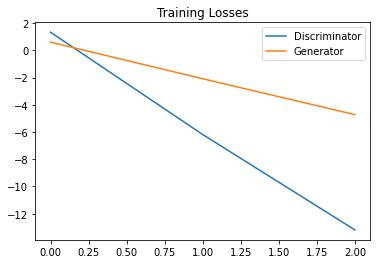

In [ ]:
show_losses(losses)

### Original images

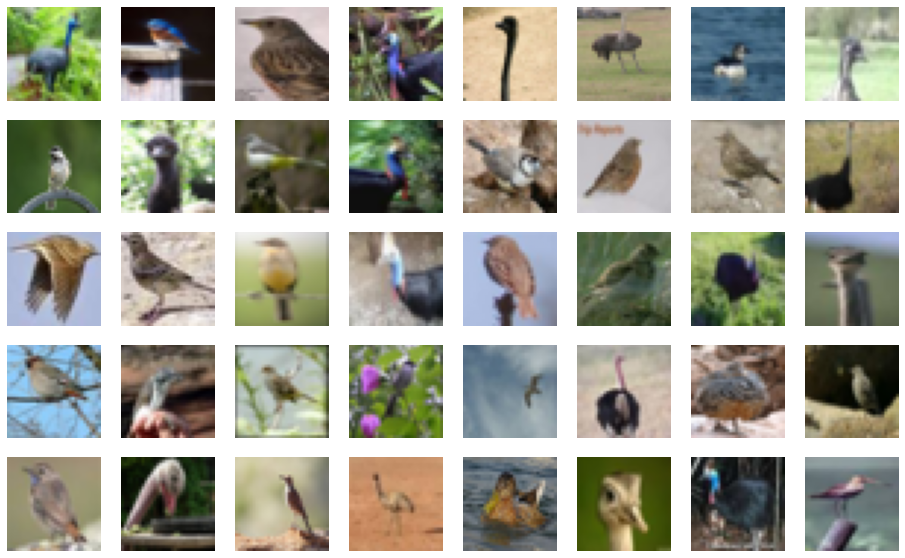

In [ ]:
s=X_train[:40]
s = 0.5 * s + 0.5
f, ax = plt.subplots(5,8, figsize=(16,10))
for i, img in enumerate(s):
        ax[i//8, i%8].imshow(img)
        ax[i//8, i%8].axis('off')
        
plt.show()

### Some images produced by the generator

2/2 [==============================] - 0s 5ms/step


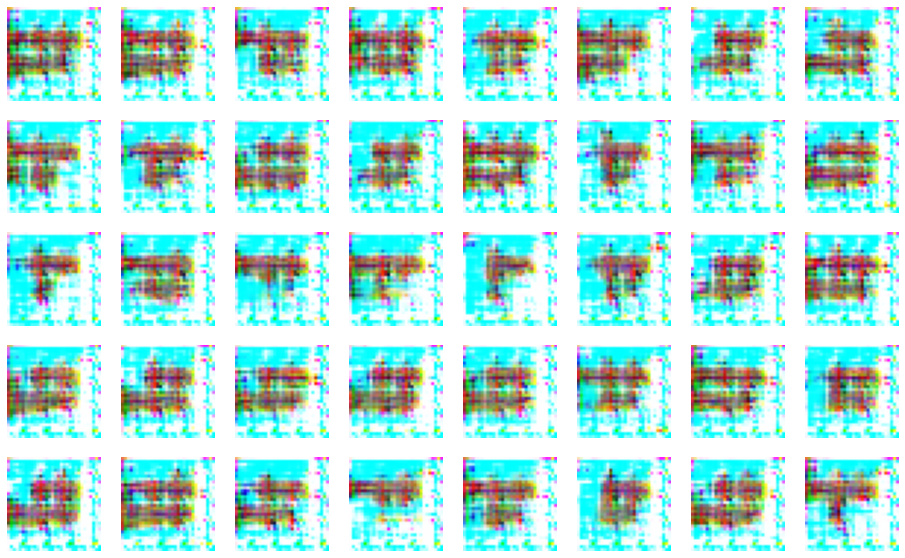

In [ ]:
noise = np.random.normal(size=(40, latent_dim))
generated_images = generator.predict(noise)
generated_images = 0.5 * generated_images + 0.5
f, ax = plt.subplots(5,8, figsize=(16,10))
for i, img in enumerate(generated_images):
        ax[i//8, i%8].imshow(img)
        ax[i//8, i%8].axis('off')
        
plt.show()